*   Student name: **[Aseem Sharma]**
*   Student Panther ID: **[6329681]** 
*   Collaborator(s): **[__]**
*   **Notice on Academic Misconduct**: Sharing your codes with other students is also an academic misconduct. If your submission is found unsually similar to that of another student, you will be reported to the SCAI as a potential academic misconduct case, regardless of your reasons. Violations may lead to suspension or expulsion from the university.

# CAP5602 Homework 3 (15% total grade)

## **Deadline: 10/19/2022 11:59 PM**

In this homework, we will train, test, and visualize SVM models on a toy classification dataset. First, execute the code snippet below to generate the dataset.

In [12]:
from sklearn.datasets import make_moons

# Generate the dataset with 300 examples
X, Y = make_moons(n_samples=300, noise=.15, random_state=15)

# Print shape of dataset for checking
print('Input shape: ', X.shape)
print('Output shape: ', Y.shape)

Input shape:  (300, 2)
Output shape:  (300,)


## 1. Visualize the dataset (1% total grade)

Using `matplotlib` to plot and show a scatter plot with all the points in the dataset. Use a different color for each different class.

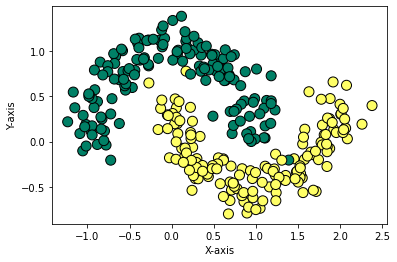

In [39]:
# Write your code here
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.summer, s=100, edgecolors = 'black')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## 2. Split dataset into train/test sets (1% total grade)

Write code to randomly split your dataset above into a train set and a test set. Your train set must contain 200 examples and your test set must contain 100 examples.

In [40]:
# Write your code here
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100,train_size=200, random_state=42)

print(X_train.shape, X_test.shape)

(200, 2) (100, 2)


## 3. Train a linear SVM (2% total grade)

Write code to define an SVM with linear kernel and regularization **C=2.0**, then train it with your train set. Use the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class to define your model.

In [21]:
# Write your code here
from sklearn.svm import SVC

svm = SVC(C=2.0, kernel='linear')
svm.fit(X_train, Y_train)

SVC(C=2.0, kernel='linear')

## 4. Evaluate your linear SVM (2% total grade)

Write code to predict the labels of the test set using your trained linear SVM above. Then compute and print out the test accuracy of your model.

In [24]:
# Write your code here

from sklearn.metrics import accuracy_score


y_prediction = svm.predict(X_test)
accur = accuracy_score(Y_test, y_prediction)

print('The test accuracy of the model is : ', accur)

The test accuracy of the model is :  0.84


## 5. Visualize your model

### 5a. Create a meshgrid on the 2-dimensional space covering the data (1% total grade)

Write code to create a meshgrid on the 2d space covering $[min\_x_i - 0.3, max\_x_i + 0.3)$ for all dimensions (or features) of your input data. Here, $min\_x_i$ is the minimum value of the $i^{th}$ feature over the entire dataset. Similarly, $max\_x_i$ is the maximum value of the $i^{th}$ feature over the dataset. Use step size 0.01 for the meshgrid. Your code should define two variables `xx` and `yy` returned from the [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function.

In [26]:
# Write your code here

import numpy as np

M0 = X[:, 0]
M1 = X[:, 1]

s_size = 0.01 #step size

M0_min, M0_max = M0.min() - 0.3, M0.max() + 0.3
M1_min, M1_max = M1.min() - 0.3, M1.max() + 0.3

xx, yy = np.meshgrid(np.arange(M0_min, M0_max, s_size),
                     np.arange(M1_min, M1_max, s_size))

print(xx)
print(yy)

[[-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]
 [-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]
 [-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]
 ...
 [-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]
 [-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]
 [-1.53487748 -1.52487748 -1.51487748 ...  2.65512252  2.66512252
   2.67512252]]
[[-1.09698629 -1.09698629 -1.09698629 ... -1.09698629 -1.09698629
  -1.09698629]
 [-1.08698629 -1.08698629 -1.08698629 ... -1.08698629 -1.08698629
  -1.08698629]
 [-1.07698629 -1.07698629 -1.07698629 ... -1.07698629 -1.07698629
  -1.07698629]
 ...
 [ 1.65301371  1.65301371  1.65301371 ...  1.65301371  1.65301371
   1.65301371]
 [ 1.66301371  1.66301371  1.66301371 ...  1.66301371  1.66301371
   1.66301371]
 [ 1.67301371  1.67301371  1.67301371 ...  1.67301371  1.67301371
   1.67301371]]


### 5b. Make predictions on the meshgrid (1% total grade)

Use your model to make predictions on your meshgrid, then reshape your predictions to the shape of `xx`.

In [30]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print(Z)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 5c. Plot your model (1% total grade)

Plot the contour of your predictions on the meshgrid (using [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)) together with the scatter plot showing the data points (with an appropriate color for each class).

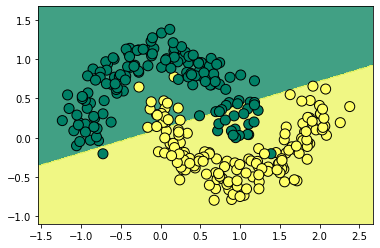

In [41]:
# Write your code here
import matplotlib.pyplot as plt
from matplotlib.pyplot import contourf

countf = contourf(xx,yy,Z,cmap=plt.cm.summer, alpha=0.8)
plt.scatter(M0, M1, c=Y, cmap=plt.cm.summer, s=100, edgecolors='black')
plt.show()

## 6. Experiment with RBF kernel SVM

### 6a. Train an SVM with RBF kernel (2% total grade)

Now, write code to define and train an SVM with an **RBF kernel and C=2.0** on the train set. You can use the default value for other parameters of your model.

In [34]:
# Write your code here
from sklearn.svm import SVC

svm_rbf = SVC(C=2.0, kernel='rbf')
svm_rbf.fit(X_train, Y_train)

SVC(C=2.0)

### 6b. Evaluate your RBF kernel SVM (1% total grade)

Write code to compute and print out the accuracy of this RBF kernel SVM on your test set. 

In [36]:
from sklearn.metrics import accuracy_score


rbf_prediciton = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(Y_test, rbf_prediciton)

print('The test accuracy of the model is : ', rbf_accuracy)

The test accuracy of the model is :  0.98


### 6c. Visualize your RBF kernel SVM (1% total grade)

Similar to questions 5b and 5c above, visualize your RBF kernel SVM. You can re-use the meshgrid constructed in question 5a and don't need to reconstruct them. Your code must show the plot containing the contour and the data points.

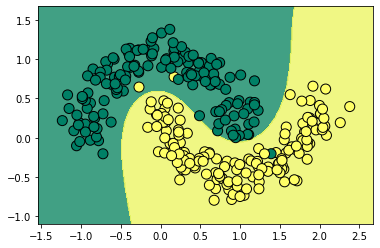

In [37]:
# Write your code here
import matplotlib.pyplot as plt
from matplotlib.pyplot import contourf

Z2 = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

rbf_countf = contourf(xx,yy,Z2,cmap=plt.cm.summer, alpha=0.8)
plt.scatter(M0, M1, c=Y, cmap=plt.cm.summer, s=100, edgecolors='black')
plt.show()


## 7. Comparing SVMs with different kernels (2% total grade)

According to the above experiments, which model is better on this dataset? Why?

**Your answer**: When the kernel was changed to RBF, The model had an accuracy acore of 0.98. Whereas, when the kermel was linear, the accuracy score was 0.84. This clearly gives us an idea that SVM with RBF is better. We also see that there are less missclassifications in the case of RBF than Linear kernel and the contour has a more geometrically stable maximum margin.